In [29]:
import pandas as pd

In [30]:
df  = pd.read_csv('train.csv')
df.head()

,ID,TITLE,ABSTRACT,Computer Science,Physics,Mathematics,Statistics,Quantitative Biology,Quantitative Finance
0,1,Reconstructing Subject-Specific Effect Maps,Predictive models allow subject-specific inf...,1,0,0,0,0,0
1,2,Rotation Invariance Neural Network,Rotation invariance and translation invarian...,1,0,0,0,0,0
2,3,Spherical polyharmonics and Poisson kernels fo...,We introduce and develop the notion of spher...,0,0,1,0,0,0
3,4,A finite element approximation for the stochas...,The stochastic Landau--Lifshitz--Gilbert (LL...,0,0,1,0,0,0
4,5,Comparative study of Discrete Wavelet Transfor...,Fourier-transform infra-red (FTIR) spectra o...,1,0,0,1,0,0


In [31]:
df.shape

(20972, 9)

In [32]:
df['count']=df.iloc[:,3:].sum(axis=1)
df.head()

,ID,TITLE,ABSTRACT,Computer Science,Physics,Mathematics,Statistics,Quantitative Biology,Quantitative Finance,count
0,1,Reconstructing Subject-Specific Effect Maps,Predictive models allow subject-specific inf...,1,0,0,0,0,0,1
1,2,Rotation Invariance Neural Network,Rotation invariance and translation invarian...,1,0,0,0,0,0,1
2,3,Spherical polyharmonics and Poisson kernels fo...,We introduce and develop the notion of spher...,0,0,1,0,0,0,1
3,4,A finite element approximation for the stochas...,The stochastic Landau--Lifshitz--Gilbert (LL...,0,0,1,0,0,0,1
4,5,Comparative study of Discrete Wavelet Transfor...,Fourier-transform infra-red (FTIR) spectra o...,1,0,0,1,0,0,2


In [33]:
df = df[df['count']<=1]

In [34]:
df_title = df[['ID', 'TITLE']]

In [35]:
df.drop(['ID', 'count', 'TITLE'], axis=1, inplace=True)

In [36]:
df_title.head()

,ID,TITLE
0,1,Reconstructing Subject-Specific Effect Maps
1,2,Rotation Invariance Neural Network
2,3,Spherical polyharmonics and Poisson kernels fo...
3,4,A finite element approximation for the stochas...
5,6,On maximizing the fundamental frequency of the...


In [37]:
df.head()

,ABSTRACT,Computer Science,Physics,Mathematics,Statistics,Quantitative Biology,Quantitative Finance
0,Predictive models allow subject-specific inf...,1,0,0,0,0,0
1,Rotation invariance and translation invarian...,1,0,0,0,0,0
2,We introduce and develop the notion of spher...,0,0,1,0,0,0
3,The stochastic Landau--Lifshitz--Gilbert (LL...,0,0,1,0,0,0
5,Let $\Omega \subset \mathbb{R}^n$ be a bound...,0,0,1,0,0,0


In [38]:
df.shape

(15928, 7)

In [39]:
df['TARGET'] = df.iloc[:, 1:].apply(lambda row: row.index[row == 1].tolist()[0] if 1 in row.values else None, axis=1)

In [40]:
df.head()

,ABSTRACT,Computer Science,Physics,Mathematics,Statistics,Quantitative Biology,Quantitative Finance,TARGET
0,Predictive models allow subject-specific inf...,1,0,0,0,0,0,Computer Science
1,Rotation invariance and translation invarian...,1,0,0,0,0,0,Computer Science
2,We introduce and develop the notion of spher...,0,0,1,0,0,0,Mathematics
3,The stochastic Landau--Lifshitz--Gilbert (LL...,0,0,1,0,0,0,Mathematics
5,Let $\Omega \subset \mathbb{R}^n$ be a bound...,0,0,1,0,0,0,Mathematics


In [41]:
def label_value(label):
    if label=="Computer Science":
        return 0
    elif label=="Mathematics":
        return 1
    elif label=="Physics":
        return 2
    elif label=="Statistics":
        return 3
    elif label=="Quantitative Biology":
        return 4
    elif label=="Quantitative Finance":
        return 5
    else:
        return 10
    
    
df['TARGET_VALUE'] = df['TARGET'].apply(label_value)

df.head()

,ABSTRACT,Computer Science,Physics,Mathematics,Statistics,Quantitative Biology,Quantitative Finance,TARGET,TARGET_VALUE
0,Predictive models allow subject-specific inf...,1,0,0,0,0,0,Computer Science,0
1,Rotation invariance and translation invarian...,1,0,0,0,0,0,Computer Science,0
2,We introduce and develop the notion of spher...,0,0,1,0,0,0,Mathematics,1
3,The stochastic Landau--Lifshitz--Gilbert (LL...,0,0,1,0,0,0,Mathematics,1
5,Let $\Omega \subset \mathbb{R}^n$ be a bound...,0,0,1,0,0,0,Mathematics,1


In [42]:
df[df['TARGET_VALUE']==10]

,ABSTRACT,Computer Science,Physics,Mathematics,Statistics,Quantitative Biology,Quantitative Finance,TARGET,TARGET_VALUE


In [43]:
df.drop(columns=['Computer Science', 'Physics','Mathematics','Statistics','Quantitative Biology','Quantitative Finance'], axis=1, inplace=True)
df.head()

,ABSTRACT,TARGET,TARGET_VALUE
0,Predictive models allow subject-specific inf...,Computer Science,0
1,Rotation invariance and translation invarian...,Computer Science,0
2,We introduce and develop the notion of spher...,Mathematics,1
3,The stochastic Landau--Lifshitz--Gilbert (LL...,Mathematics,1
5,Let $\Omega \subset \mathbb{R}^n$ be a bound...,Mathematics,1


In [44]:
df['TARGET'].value_counts()

TARGET
Physics                 5120
Computer Science        4910
Mathematics             3610
Statistics              1636
Quantitative Biology     443
Quantitative Finance     209
Name: count, dtype: int64

#### Looking at the value counts for each target, it will be no surprise if our model can't find keywords relating to Quantitative Biology and Quantitative Finance topics 

In [47]:
def reduce_instances(df, max_instances):

    max_instances = max_instances

    reduced_df = pd.DataFrame(columns=df.columns)

    for target in df['TARGET'].unique():
        # Get up to max_instances instances for each target
        target_data = df[df['TARGET'] == target].head(max_instances)

        # Append to the reduced DataFrame
        reduced_df = pd.concat([reduced_df, target_data])
        
    return reduced_df

In [48]:
df = reduce_instances(df, 500)

pprint(df.shape)

pprint(df['TARGET'].value_counts())

df.sample(5)

(2652, 3)
TARGET
Computer Science        500
Mathematics             500
Physics                 500
Statistics              500
Quantitative Biology    443
Quantitative Finance    209
Name: count, dtype: int64


,ABSTRACT,TARGET,TARGET_VALUE
18795,Identifying community structure of a complex...,Quantitative Biology,4
4664,Rapid changes in extracellular osmolarity ar...,Quantitative Biology,4
200,The topological morphology--order of zeros a...,Physics,2
3255,This paper derives new formulations for desi...,Statistics,3
1213,This paper gives drastically faster gossip a...,Computer Science,0


In [51]:
df.reset_index(drop=True, inplace=True)
df.head()

,ABSTRACT,TARGET,TARGET_VALUE
0,Predictive models allow subject-specific inf...,Computer Science,0
1,Rotation invariance and translation invarian...,Computer Science,0
2,We present a systematic global sensitivity a...,Computer Science,0
3,"The classical Eilenberg correspondence, base...",Computer Science,0
4,The Fault Detection and Isolation Tools (FDI...,Computer Science,0


### Latent Dirichlet Allocation - LDA for Topic Modeling

In [52]:
import nltk; nltk.download('stopwords')

# Run in terminal or command prompt
!python3 -m spacy download en

!pip install gensim pyLDAvis

[nltk_data] Downloading package stopwords to /home/contra/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


2024-01-22 15:52:00.528247: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
2024-01-22 15:52:03.494746: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1956] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...
⚠ As of spaCy v3.0, shortcuts like 'en' are deprecated. Please use the
full pipeline package name 'en_core_web_sm' instead.
Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [53]:
import re
import numpy as np
import pandas as pd
from pprint import pprint

# Gensim
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel

# spacy for lemmatization
import spacy

# Plotting tools
import pyLDAvis
import pyLDAvis.gensim  # don't skip this
import matplotlib.pyplot as plt
%matplotlib inline

# Enable logging for gensim - optional
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.ERROR)

import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)

LDA’s approach to topic modeling is it considers each document as a collection of topics in a certain proportion. And each topic as a collection of keywords, again, in a certain proportion.

Once you provide the algorithm with the number of topics, all it does it to rearrange the topics distribution within the documents and keywords distribution within the topics to obtain a good composition of topic-keywords distribution.

In [54]:
# stopwords
import nltk
nltk.download('punkt')
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use'])

[nltk_data] Downloading package punkt to /home/contra/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [55]:
## Text Cleaning (email, newlines, punctuations, stopwords)
import string
def cleaner(text):
    #lowercasing
    text = text.lower()
    # remove emails
    text = re.sub('\S*@\S*\s?', '', text)
    # Remove new line characters
    text = re.sub('\s+', ' ', text)
    # Remove distracting single quotes
    text = re.sub("\'", "", text)
    # remove punctuations
    text = text.translate(str.maketrans("","",string.punctuation))
    # remove stopwords
    words = nltk.word_tokenize(text)
    filtered_words = [word for word in words if word.lower() not in stopwords.words('english')]
    text = ' '.join(filtered_words)
    
    return text

df['ABSTRACT'] = df['ABSTRACT'].apply(cleaner)

df.head()

,ABSTRACT,TARGET,TARGET_VALUE
0,predictive models allow subjectspecific infere...,Computer Science,0
1,rotation invariance translation invariance gre...,Computer Science,0
2,present systematic global sensitivity analysis...,Computer Science,0
3,classical eilenberg correspondence based conce...,Computer Science,0
4,fault detection isolation tools fditools colle...,Computer Science,0


In [67]:
# Make bigrams trigrams

## Tokenize
data = df.ABSTRACT.values.tolist()
def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))  # deacc=True removes punctuations
data_words = list(sent_to_words(data))

## Build the bigram and trigram models
bigram = gensim.models.Phrases(data_words, min_count=5, threshold=100) # higher threshold fewer phrases.
trigram = gensim.models.Phrases(bigram[data_words], threshold=100)  

## Faster way to get a sentence clubbed as a trigram/bigram
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)

## See trigram example
print(trigram_mod[bigram_mod[data_words[0]]])


['predictive', 'models', 'allow', 'subjectspecific', 'inference', 'analyzing', 'disease', 'related', 'alterations', 'neuroimaging', 'data', 'given', 'subjects', 'data', 'inference', 'made', 'two', 'levels', 'global', 'ie', 'identifiying', 'condition', 'presence', 'subject', 'local', 'ie', 'detecting', 'condition', 'effect', 'individual', 'measurement', 'extracted', 'subjects', 'data', 'global', 'inference', 'widely_used', 'local', 'inference', 'used', 'form', 'subjectspecific', 'effect', 'maps', 'rarely', 'used', 'existing', 'models', 'often', 'yield', 'noisy', 'detections', 'composed', 'dispersed', 'isolated', 'islands', 'article', 'propose', 'reconstruction', 'method', 'named', 'rsm', 'improve', 'subjectspecific', 'detections', 'predictive', 'modeling', 'approaches', 'particular', 'binary', 'classifiers', 'rsm', 'specifically', 'aims', 'reduce', 'noise', 'due', 'sampling', 'error', 'associated', 'using', 'finite', 'sample', 'examples', 'train', 'classifiers', 'proposed', 'method', 'w

In [77]:
def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]

def make_trigrams(texts):
    return [trigram_mod[bigram_mod[doc]] for doc in texts]

def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    """https://spacy.io/api/annotation"""
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    return texts_out

In [79]:
data_words_bigrams = make_bigrams(data_words)

nlp = nlp = spacy.load("en_core_web_sm", disable=['parser', 'ner'])
# Do lemmatization keeping only noun, adj, vb, adv
data_lemmatized = lemmatization(data_words_bigrams, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])



In [70]:
data_words_bigrams

[['predictive',
  'models',
  'allow',
  'subjectspecific',
  'inference',
  'analyzing',
  'disease',
  'related',
  'alterations',
  'neuroimaging',
  'data',
  'given',
  'subjects',
  'data',
  'inference',
  'made',
  'two',
  'levels',
  'global',
  'ie',
  'identifiying',
  'condition',
  'presence',
  'subject',
  'local',
  'ie',
  'detecting',
  'condition',
  'effect',
  'individual',
  'measurement',
  'extracted',
  'subjects',
  'data',
  'global',
  'inference',
  'widely_used',
  'local',
  'inference',
  'used',
  'form',
  'subjectspecific',
  'effect',
  'maps',
  'rarely',
  'used',
  'existing',
  'models',
  'often',
  'yield',
  'noisy',
  'detections',
  'composed',
  'dispersed',
  'isolated',
  'islands',
  'article',
  'propose',
  'reconstruction',
  'method',
  'named',
  'rsm',
  'improve',
  'subjectspecific',
  'detections',
  'predictive',
  'modeling',
  'approaches',
  'particular',
  'binary',
  'classifiers',
  'rsm',
  'specifically',
  'aims',
  '

## Creating dictionary and corpus for topic modeling

In [80]:
# Create Dictionary
id2word = corpora.Dictionary(data_lemmatized)

# Create Corpus
texts = data_lemmatized

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

# View
print(corpus[:1])

[[(0, 1), (1, 1), (2, 2), (3, 1), (4, 1), (5, 1), (6, 1), (7, 2), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 2), (16, 1), (17, 1), (18, 3), (19, 1), (20, 1), (21, 3), (22, 1), (23, 1), (24, 1), (25, 1), (26, 2), (27, 6), (28, 1), (29, 1), (30, 5), (31, 1), (32, 1), (33, 1), (34, 1), (35, 1), (36, 1), (37, 2), (38, 1), (39, 1), (40, 1), (41, 1), (42, 1), (43, 1), (44, 1), (45, 1), (46, 1), (47, 1), (48, 1), (49, 1), (50, 1), (51, 2), (52, 1), (53, 1), (54, 2), (55, 2), (56, 1), (57, 1), (58, 4), (59, 1), (60, 1), (61, 1), (62, 1), (63, 2), (64, 2), (65, 1), (66, 1), (67, 1), (68, 1), (69, 1), (70, 1), (71, 1), (72, 2), (73, 1), (74, 4), (75, 1), (76, 1), (77, 2), (78, 1), (79, 1), (80, 1), (81, 1), (82, 1), (83, 1), (84, 1), (85, 1), (86, 2), (87, 2), (88, 1), (89, 1), (90, 2), (91, 1), (92, 2), (93, 1), (94, 1), (95, 2), (96, 1), (97, 2), (98, 1), (99, 2), (100, 1), (101, 1), (102, 1), (103, 3), (104, 4), (105, 1), (106, 1), (107, 1), (108, 1), (109, 1), (110, 7)

Gensim creates a unique id for each word in the document. The produced corpus shown above is a mapping of (word_id, word_frequency).

For example, (0, 1) above implies, word id 0 occurs once in the first document. Likewise, word id 1 occurs twice and so on.

This is used as the input by the LDA model.

If you want to see what word a given id corresponds to, pass the id as a key to the dictionary.

In [72]:
id2word[0]

'accuracy'

In [73]:
[[(id,id2word[id], freq) for id, freq in cp] for cp in corpus[:1]]

[[(0, 'accuracy', 1),
  (1, 'ad', 1),
  (2, 'adni', 3),
  (3, 'aims', 1),
  (4, 'algorithm', 1),
  (5, 'allow', 1),
  (6, 'also', 1),
  (7, 'alterations', 1),
  (8, 'alzheimers_disease', 2),
  (9, 'amyloidbeta', 1),
  (10, 'analyses', 1),
  (11, 'analyzing', 1),
  (12, 'approaches', 1),
  (13, 'article', 1),
  (14, 'associated', 1),
  (15, 'averaging', 1),
  (16, 'binary', 2),
  (17, 'bootstrap', 1),
  (18, 'cerebrospinal', 1),
  (19, 'classifiers', 3),
  (20, 'compared', 1),
  (21, 'composed', 1),
  (22, 'condition', 3),
  (23, 'correlation', 1),
  (24, 'cortical', 1),
  (25, 'data', 8),
  (26, 'database', 1),
  (27, 'dataset', 2),
  (28, 'demonstrate', 1),
  (29, 'detecting', 1),
  (30, 'detection', 2),
  (31, 'detections', 3),
  (32, 'diagnostic', 1),
  (33, 'different', 1),
  (34, 'directly', 1),
  (35, 'disease', 1),
  (36, 'dispersed', 1),
  (37, 'due', 1),
  (38, 'effect', 2),
  (39, 'error', 1),
  (40, 'estimated', 1),
  (41, 'evaluation', 1),
  (42, 'examination', 1),
  (43, '

## LDA MODEL

In [81]:
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=10, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10, 
                                           alpha='auto',
                                           per_word_topics=True)

### View topics (keywords) as found by LDA model

In [82]:
# Computer Science  	Physics 	Mathematics 	Statistics  	Quantitative Biology 	Quantitative Finance

pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.027*"regression" + 0.020*"metric" + 0.016*"net" + 0.015*"central" + '
  '0.015*"examine" + 0.015*"exchange" + 0.014*"relation" + 0.013*"family" + '
  '0.013*"extension" + 0.012*"worker"'),
 (1,
  '0.033*"model" + 0.019*"use" + 0.010*"network" + 0.009*"result" + '
  '0.009*"approach" + 0.009*"study" + 0.008*"show" + 0.007*"distribution" + '
  '0.007*"method" + 0.007*"provide"'),
 (2,
  '0.050*"agent" + 0.030*"policy" + 0.025*"claim" + 0.025*"economy" + '
  '0.024*"negative" + 0.024*"event" + 0.022*"conditional" + 0.019*"company" + '
  '0.017*"force" + 0.017*"shock"'),
 (3,
  '0.101*"market" + 0.071*"price" + 0.032*"stock" + 0.024*"trading" + '
  '0.023*"empirical" + 0.019*"trade" + 0.017*"investor" + 0.011*"tax" + '
  '0.011*"cost" + 0.011*"bitcoin"'),
 (4,
  '0.063*"activity" + 0.046*"country" + 0.038*"contract" + 0.023*"generally" + '
  '0.022*"package" + 0.021*"institutional" + 0.021*"neuronal" + '
  '0.015*"configuration" + 0.013*"gender" + 0.009*"clarify"'),
 (5,
  '0.019

Perplexity and topic coherence are two different metrics used to evaluate the performance of topic models, such as Latent Dirichlet Allocation (LDA), in natural language processing and machine learning.

The perplexity of a language model on a given test set is calculated as 2 to the power of the cross-entropy of the model on the test set. Lower perplexity means better model. Perplexity is a measure of how well a probability distribution or probability model predicts a sample.



In [83]:
# Compute Perplexity
print('\nPerplexity: ', lda_model.log_perplexity(corpus))  # a measure of how good the model is. lower the better.

# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Perplexity:  -8.966111597830862

Coherence Score:  0.4395276564946484


**The Score is 43.95%**

### Visualization

In [84]:
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, corpus, id2word)
vis

/home/contra/.local/lib/python3.10/site-packages/pyLDAvis/_prepare.py:9: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd
/home/contra/.local/lib/python3.10/site-packages/pyLDAvis/_prepare.py:9: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
   

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
1      0.312686 -0.039280       1        1  51.041244
5      0.253520  0.198917       2        1  17.257371
8      0.180190 -0.318843       3        1  13.585558
7      0.060790  0.166241       4        1   5.591460
6     -0.063706  0.081232       5        1   3.939042
0     -0.114529  0.030343       6        1   3.243509
3     -0.142169 -0.072076       7        1   2.590906
2     -0.167477 -0.022167       8        1   1.480065
9     -0.159997 -0.012157       9        1   0.784136
4     -0.159307 -0.012209      10        1   0.486710, topic_info=              Term         Freq        Total Category  logprob  loglift
27           datum  1563.000000  1563.000000  Default  30.0000  30.0000
89         problem  1009.000000  1009.000000  Default  29.0000  29.0000
1445        market   550.000000   550.000000  Default  28.0000  28.0000
74           model  3654.000000  3654.000000  Default  27.0000  27.0000
3902         price   391.000000   391.000000  Default  26.0000  26.0000
...            ...          ...          ...      ...      ...      ...
2820       comment     2.553089     3.338257  Topic10  -5.9975   5.0571
2680     interview     2.349858     3.135334  Topic10  -6.0804   5.0369
1714         young     2.278810     3.063696  Topic10  -6.1111   5.0293
4824         phone     1.868828     2.653816  Topic10  -6.3095   4.9746
13066  homeostasis     1.731548     2.516949  Topic10  -6.3858   4.9512

[458 rows x 6 columns], token_table=      Topic      Freq         Term
term                              
3755      7  0.980934   accurately
114       1  0.160154      achieve
114       3  0.838255      achieve
2699      8  0.981267  acquisition
1431     10  0.992766     activity
...     ...       ...          ...
479       1  0.870273         work
479       2  0.038634         work
479       3  0.089467         work
2249      6  0.985962       worker
1714     10  0.652806        young

[583 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 6, 9, 8, 7, 1, 4, 3, 10, 5])

So how to infer pyLDAvis’s output?

Each bubble on the left-hand side plot represents a topic. The larger the bubble, the more prevalent is that topic.
A good topic model will have fairly big, non-overlapping bubbles scattered throughout the chart instead of being clustered in one quadrant.
A model with too many topics, will typically have many overlaps, small sized bubbles clustered in one region of the chart.

Alright, if you move the cursor over one of the bubbles, the words and bars on the right-hand side will update. These words are the salient keywords that form the selected topic.
We have successfully built a good looking topic model.
Given our prior knowledge of the number of natural topics in the document, finding the best model was fairly straightforward.

Upnext, we will improve upon this model by using Mallet’s version of LDA algorithm and then we will focus on how to arrive at the optimal number of topics given any large corpus of text.

### LDA Mallet Model


||Note: It was depricated from gensim v4. If needed, you can downgrade gensim to v3.8.3 to use and see how this would work.||

In [ ]:
# mallet_path = 'mallet-2.0.8/bin/mallet'
# ldamallet = gensim.models.wrappers.LdaMallet(mallet_path, corpus=corpus, num_topics=20, id2word=id2word)


# # Show Topics
# pprint(ldamallet.show_topics(formatted=False))

# # Compute Coherence Score
# coherence_model_ldamallet = CoherenceModel(model=ldamallet, texts=data_words, dictionary=id2word, coherence='c_v')
# coherence_ldamallet = coherence_model_ldamallet.get_coherence()
# print('\nCoherence Score: ', coherence_ldamallet)

### Finding Optimal number of Topics

In [85]:
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=dictionary,
                                           num_topics=num_topics, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10, 
                                           alpha='auto',
                                           per_word_topics=True)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

In [93]:
model_list, coherence_values = compute_coherence_values(dictionary=id2word, corpus=corpus, texts=data_lemmatized, start=2, limit=40, step=6)

In [94]:
coherence_values

[0.3510244538705646,
 0.4212969063849168,
 0.4568516754654325,
 0.45344467280530126,
 0.39765212036608877,
 0.38210413942326327,
 0.37984933265086723]

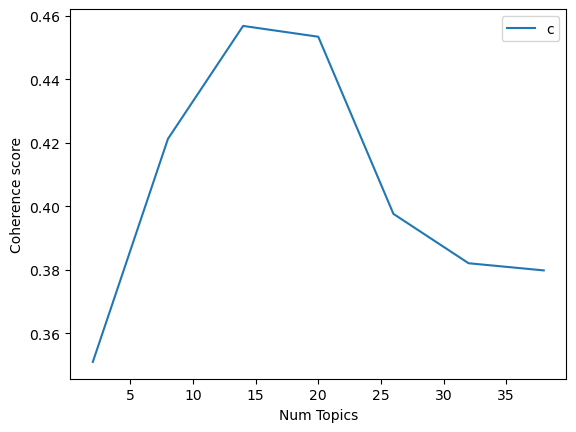

In [95]:
# Show graph
limit=40; start=2; step=6;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

**Looks like our optimal choice for topics will be 14. We will see topics in that model**

In [96]:
# Select the model and print the topics
optimal_model = model_list[2]
model_topics = optimal_model.show_topics(formatted=False)
pprint(optimal_model.print_topics(num_words=10))

[(0,
  '0.069*"functional" + 0.050*"metric" + 0.040*"choice" + 0.038*"central" + '
  '0.032*"curve" + 0.030*"worker" + 0.028*"behaviour" + 0.024*"embed" + '
  '0.023*"discover" + 0.017*"homogeneous"'),
 (1,
  '0.034*"model" + 0.020*"use" + 0.015*"datum" + 0.012*"method" + '
  '0.011*"propose" + 0.010*"approach" + 0.010*"result" + 0.010*"study" + '
  '0.008*"show" + 0.008*"process"'),
 (2,
  '0.109*"option" + 0.090*"cell" + 0.048*"adaptive" + 0.031*"diffusion" + '
  '0.026*"cancer" + 0.019*"datadriven" + 0.018*"tumor" + 0.014*"mainly" + '
  '0.013*"restriction" + 0.013*"coupling"'),
 (3,
  '0.147*"network" + 0.061*"learn" + 0.035*"neural" + 0.034*"agent" + '
  '0.033*"representation" + 0.032*"task" + 0.031*"train" + 0.025*"input" + '
  '0.025*"trade" + 0.020*"policy"'),
 (4,
  '0.045*"life" + 0.038*"wind" + 0.014*"station" + '
  '0.013*"sufficient_condition" + 0.009*"interestingly" + 0.006*"height" + '
  '0.004*"young" + 0.000*"forecast" + 0.000*"forecasting" + 0.000*"dbn"'),
 (5,
  '0.

**Finding dominant topic in each sentence**

In [131]:
# def format_topics_sentences(ldamodel=lda_model, corpus=corpus, texts=data):
#     # Init output
#     sent_topics_df = pd.DataFrame(columns=['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords', 'Text'])
    
#     # Get main topic in each document
#     for i, row in enumerate(ldamodel[corpus]):
#         row = sorted(row[0], key=lambda x: (x[1]), reverse=True)
#         # Get the Dominant topic, Perc Contribution and Keywords for each document
#         for j, (topic_num, prop_topic) in enumerate(row):
#             if j == 0:  # => dominant topic
#                 wp = ldamodel.show_topic(topic_num)
#                 topic_keywords = ", ".join([word for word, prop in wp])
#                 temp_df = pd.DataFrame({'Dominant_Topic': [int(topic_num)],
#                                         'Perc_Contribution': [round(prop_topic, 4)],
#                                         'Topic_Keywords': [topic_keywords],
#                                         'Text':[texts[i]]
#                                        })
#                 sent_topics_df = pd.concat([sent_topics_df, temp_df],ignore_index=True)
#             else:
#                 break
#     return sent_topics_df


# df_topic_sents_keywords = format_topics_sentences(ldamodel=optimal_model, corpus=corpus, texts=data)

# # Format
# df_dominant_topic = df_topic_sents_keywords.reset_index()
# df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']

# # Show
# df_dominant_topic.head(10)



# # for j, (topic_num, prop_topic) in enumerate(row):
# #             if j == 0:  # => dominant topic
# #                 wp = ldamodel.show_topic(topic_num)
# #                 topic_keywords = ", ".join([word for word, prop in wp])
                
# #                 sent_topics_df = pd.concat([sent_topics_df, temp_df], ignore_index=True)

In [130]:
# df_dominant_topic['Dominant_Topic'].value_counts()

## Find the most representative document for each topic

In [129]:
# # Group top 5 sentences under each topic
# sent_topics_sorteddf_mallet = pd.DataFrame()

# sent_topics_outdf_grpd = df_topic_sents_keywords.groupby('Dominant_Topic')

# for i, grp in sent_topics_outdf_grpd:
#     sent_topics_sorteddf_mallet = pd.concat([sent_topics_sorteddf_mallet, 
#                                              grp.sort_values(['Perc_Contribution'], ascending=[0]).head(1)], 
#                                             axis=0)

# # Reset Index    
# sent_topics_sorteddf_mallet.reset_index(drop=True, inplace=True)

# # Format
# sent_topics_sorteddf_mallet.columns = ['Topic_Num', "Topic_Perc_Contrib", "Keywords", "Text"]

# # Show
# sent_topics_sorteddf_mallet.head()

We started with understanding what topic modeling can do. We built a basic topic model using Gensim’s LDA and visualize the topics using pyLDAvis.

You saw how to find the optimal number of topics using coherence scores and how you can come to a logical understanding of how to choose the optimal model.

Finally we saw how to aggregate and present the results to generate insights that may be in a more actionable.